GROUP MEMBERS :
1.  Aniruddh Shukla 
2. Gaurav Singhal 
3. Himanshi Bajaj 


In [0]:
import matplotlib.pyplot as plt
import os
%matplotlib inline
import tensorflow as tf
import numpy as np
os.chdir("/content/drive/My Drive/Colab Notebooks")

# Autoencoders for Fashion MNIST

In [3]:
fmnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fmnist.load_data()
print("Number of Training examples:",train_images.shape[0])
print("Number of in Test examples:",test_images.shape[0])
print("Train images shape:",train_images.shape)
# print("Train labels shape:",train_labels.shape)
print("Test images shape:",test_images.shape)
# print("Test labels shape:",test_labels.shape)

4423680/4422102 [==============================] - 0s 0us/step
Number of Training examples: 60000
Number of in Test examples: 10000
Train images shape: (60000, 28, 28)
Test images shape: (10000, 28, 28)


In [0]:
train_data = tf.data.Dataset.from_tensor_slices((train_images.astype(np.float32) / 255.0))
train_data = train_data.batch(128)

test_data = tf.data.Dataset.from_tensor_slices((test_images.astype(np.float32) / 255.0)).batch(128)

In [0]:
def encoder(x):
  # flatten_input_batch = tf.reshape(x,[-1,784])
  encoder = tf.keras.layers.Dense(units=256,activation=tf.nn.relu, kernel_initializer='he_uniform')(x)
  encoder = tf.keras.layers.Dense(units=128,activation=tf.nn.relu, kernel_initializer='he_uniform')(encoder)
  encoder = tf.keras.layers.Dense(units=64,activation=tf.nn.relu, kernel_initializer='he_uniform')(encoder)
  return encoder

In [0]:
def decoder(x):
  decoder = tf.keras.layers.Dense(units=64,activation=tf.nn.relu, kernel_initializer='he_uniform')(x)
  decoder = tf.keras.layers.Dense(units=128,activation=tf.nn.relu, kernel_initializer='he_uniform')(decoder)
  decoder = tf.keras.layers.Dense(units=256,activation=tf.nn.relu, kernel_initializer='he_uniform')(decoder)
  decoder = tf.keras.layers.Dense(units=784,activation=tf.nn.relu, kernel_initializer='he_uniform')(decoder)
  return decoder

In [0]:
class Autoencoder(tf.keras.Model):
  def call(self,input_batch):
    encoder_out = encoder(input_batch)
    decoder_out = decoder(encoder_out)
    return decoder_out
autoencoder = Autoencoder()

In [0]:
opt = tf.optimizers.Adam(learning_rate=0.005)

def loss_func(model, original):
  reconstruction_error = tf.reduce_mean(tf.keras.losses.mean_squared_error(original,model(original)))
  # reconstruction_error = tf.reduce_mean(tf.square(tf.subtract(model(original),original)))
  # reconstruction_error = tf.keras.losses.binary_crossentropy(original,model(original))
  return reconstruction_error

In [70]:
epochs = 5
for epoch in range(epochs):
  print("epoch number :", epoch)

  for step, input_batch in enumerate(train_data):
    flatten_input_batch = tf.reshape(input_batch,[-1,784])
    with tf.GradientTape() as tape:

      xent = loss_func(autoencoder, flatten_input_batch)
      
    gradient = tape.gradient(xent,autoencoder.trainable_variables)
    opt.apply_gradients(zip(gradient,autoencoder.trainable_variables))

  print("Loss: {} ".format(xent))

epoch number : 0
Loss: 0.24449075758457184 
epoch number : 1
Loss: 0.3186211585998535 
epoch number : 2
Loss: 0.21698515117168427 
epoch number : 3
Loss: 0.21948786079883575 
epoch number : 4
Loss: 0.2289477437734604 


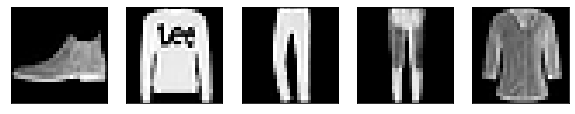

In [74]:
plt.figure(figsize=(10,10))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_images[i].reshape(28,28), cmap='gray')
plt.show()

In [0]:
reconstructed_output_t = autoencoder(test_images.reshape([-1,784]))
reconstructed_output_t = tf.reshape(reconstructed_output_t,(reconstructed_output_t.shape[0],28,28))

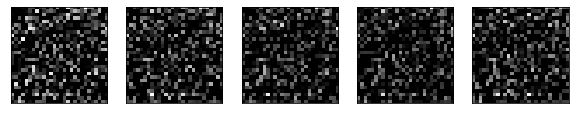

In [87]:
plt.figure(figsize=(10,10))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(reconstructed_output_t[i], cmap='gray')
plt.show()

# Autoencoders for Fashion MNIST : Method 2 

In [88]:
fmnist = tf.keras.datasets.fashion_mnist
(train_images_m, train_labels_m), (test_images_m, test_labels_m) = fmnist.load_data()
print("Number of Training examples:",train_images_m.shape[0])
print("Number of in Test examples:",test_images_m.shape[0])
print("Train images shape:",train_images_m.shape)
# print("Train labels shape:",train_labels_m.shape)
print("Test images shape:",test_images_m.shape)
# print("Test labels shape:",test_labels_m.shape)

train_images_m = train_images_m.astype(np.float32) / 255.
test_images_m = test_images_m.astype(np.float32) / 255.

train_images_m = train_images_m.reshape(train_images.shape[0],784)
test_images_m = test_images_m.reshape(test_images.shape[0],784)

Number of Training examples: 60000
Number of in Test examples: 10000
Train images shape: (60000, 28, 28)
Test images shape: (10000, 28, 28)


In [0]:
input = tf.keras.layers.Input(shape=(784,))
encoder_mlp = tf.keras.layers.Dense(units=256,activation=tf.nn.relu, kernel_initializer='he_uniform')(input)
encoder_mlp = tf.keras.layers.Dense(units=128,activation=tf.nn.relu, kernel_initializer='he_uniform')(encoder_mlp)
encoder_mlp = tf.keras.layers.Dense(units=64,activation=tf.nn.relu, kernel_initializer='he_uniform')(encoder_mlp)

In [0]:
decoder_mlp = tf.keras.layers.Dense(units=64,activation=tf.nn.relu, kernel_initializer='he_uniform')(encoder_mlp)
decoder_mlp = tf.keras.layers.Dense(units=128,activation=tf.nn.relu, kernel_initializer='he_uniform')(decoder_mlp)
decoder_mlp = tf.keras.layers.Dense(units=256,activation=tf.nn.relu, kernel_initializer='he_uniform')(decoder_mlp)
decoder_mlp = tf.keras.layers.Dense(units=784,activation=tf.nn.relu, kernel_initializer='he_uniform')(decoder_mlp)

In [91]:
autoencoder_mlp = tf.keras.Model(input,decoder_mlp)
autoencoder_mlp.compile(optimizer = 'adam',loss = tf.keras.losses.mean_squared_error)
autoencoder_mlp.summary()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_87 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_88 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_89 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_90 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_91 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_92 (Dense)             (None, 256)               330

In [0]:
# output = train_images.reshape([-1,784])

In [93]:
autoencoder_mlp.fit(train_images_m,train_images_m,batch_size=128,epochs=20,validation_data=[test_images_m,test_images_m],shuffle=True)

Epoch 1/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0381 - val_loss: 0.0000e+00
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0228 - val_loss: 0.0000e+00
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0205 - val_loss: 0.0000e+00
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0190 - val_loss: 0.0000e+00
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0180 - val_loss: 0.0000e+00
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0174 - val_loss: 0.0000e+00
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0169 - val_loss: 0.0000e+00
Epoch 8/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0165 - val_loss: 0.0000e+00
Epoch 9/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0161 - val_loss: 0.0000e+00
Epoch 10/20
469/469 [==============================] - 2s 5ms/st

In [0]:
decoder_out_m = autoencoder_mlp.predict(test_images_m)

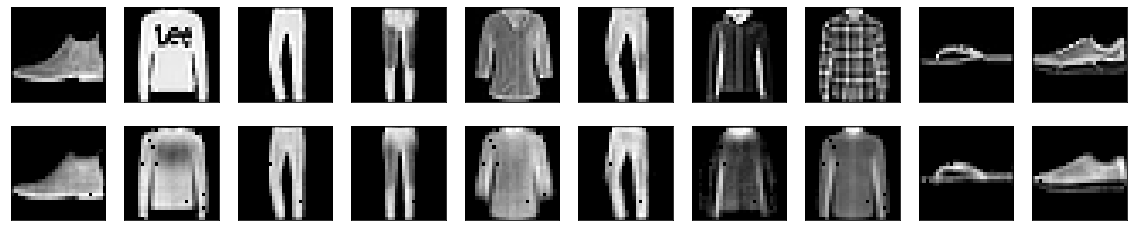

In [95]:
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
  ax = plt.subplot(2,n,i+1)
  plt.imshow(test_images_m[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2,n,i+n+1)
  plt.imshow(decoder_out_m[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

# Convolutional Autoencoders

In [65]:
fmnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fmnist.load_data()
print("Number of Training examples:",train_images.shape[0])
print("Number of in Test examples:",test_images.shape[0])
print("Train images shape:",train_images.shape)
# print("Train labels shape:",train_labels.shape)
print("Test images shape:",test_images.shape)
# print("Test labels shape:",test_labels.shape)

train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

train_images = train_images.reshape(train_images.shape[0],28,28,1)
test_images = test_images.reshape(test_images.shape[0],28,28,1)

Number of Training examples: 60000
Number of in Test examples: 10000
Train images shape: (60000, 28, 28)
Test images shape: (10000, 28, 28)


In [0]:
input = tf.keras.layers.Input(shape=(28,28,1))
encoder = tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same')(input)
encoder = tf.keras.layers.MaxPool2D(pool_size=(2,2))(encoder)

encoder = tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu',padding='same')(encoder)
encoder = tf.keras.layers.MaxPool2D(pool_size=(2,2))(encoder)

encoder = tf.keras.layers.Conv2D(filters=8,kernel_size=(3,3),activation='relu',padding='same')(encoder)
encoder = tf.keras.layers.MaxPool2D(pool_size=(2,2))(encoder)

In [0]:
decoder = tf.keras.layers.Conv2D(filters=8,kernel_size=(3,3),activation='relu',padding='same')(encoder)
decoder = tf.keras.layers.UpSampling2D(size=(3,3))(decoder)

decoder = tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu',padding='valid')(decoder)
decoder = tf.keras.layers.UpSampling2D(size=(2,2))(decoder)

decoder = tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same')(decoder)
decoder = tf.keras.layers.UpSampling2D(size=(2,2))(decoder)

decoder = tf.keras.layers.Conv2D(filters=1,kernel_size=(3,3),activation='sigmoid',padding='same')(decoder)

In [68]:
autoencoder_conv = tf.keras.Model(input,decoder)
autoencoder_conv.compile(optimizer = 'adam',loss = tf.keras.losses.mean_squared_error)
autoencoder_conv.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 8)           0  

In [69]:
autoencoder_conv.fit(train_images,train_images,batch_size=128,epochs=20,validation_data=(test_images,test_images),shuffle=True)

Epoch 1/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0379 - val_loss: 0.0250
Epoch 2/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0230 - val_loss: 0.0215
Epoch 3/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0206 - val_loss: 0.0198
Epoch 4/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0192 - val_loss: 0.0189
Epoch 5/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0184 - val_loss: 0.0180
Epoch 6/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0178 - val_loss: 0.0175
Epoch 7/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0173 - val_loss: 0.0171
Epoch 8/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0170 - val_loss: 0.0169
Epoch 9/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0167 - val_loss: 0.0167
Epoch 10/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0164 - val_lo

In [0]:
decoder_out_conv = autoencoder_conv.predict(test_images)

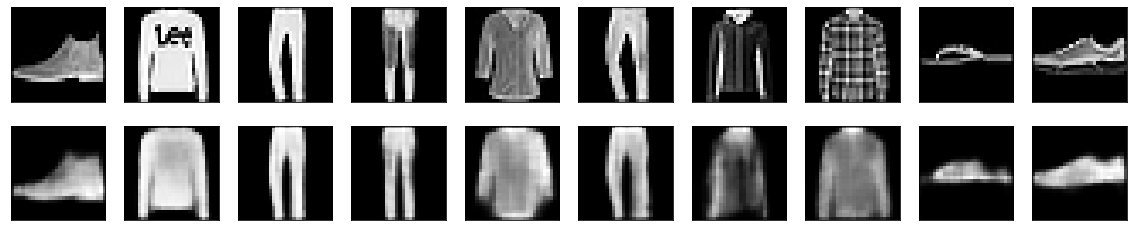

In [71]:
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
  ax = plt.subplot(2,n,i+1)
  plt.imshow(test_images[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2,n,i+n+1)
  plt.imshow(decoder_out_conv[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
autoencoder_conv.save_weights('autoencoder_conv.h5')

# What do Autoencoders Learn?

In [152]:
weights_mlp = []
for layer in autoencoder_mlp.layers:
  print(layer.get_config())
  # print(layer.get_weights())
  weights_mlp.append(layer.get_weights())

{'batch_input_shape': (None, 784), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'input_13'}
{'name': 'dense_87', 'trainable': True, 'dtype': 'float32', 'units': 256, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 2.0, 'mode': 'fan_in', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
{'name': 'dense_88', 'trainable': True, 'dtype': 'float32', 'units': 128, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 2.0, 'mode': 'fan_in', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constrai

In [153]:
layer_one_encoder_mlp_weights = weights_mlp[1][0]
layer_last_decoder_mlp_weights = weights_mlp[7][0]

print(layer_one_encoder_mlp_weights.shape)
print(layer_last_decoder_mlp_weights.shape)

(784, 256)
(256, 784)


In [0]:
encoder_img = np.reshape(layer_one_encoder_mlp_weights[:,0],(28,28))
decoder_img = np.reshape(layer_last_decoder_mlp_weights[0,:],(28,28))

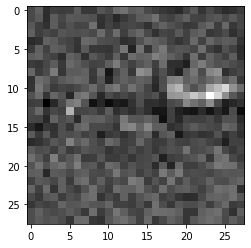

In [155]:
plt.imshow(encoder_img,cmap=plt.cm.binary)

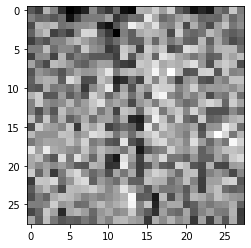

In [156]:
plt.imshow(np.reshape(layer_one_encoder_mlp_weights[:,5],(28,28)),cmap=plt.cm.binary)

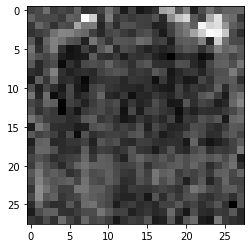

In [157]:
plt.imshow(np.reshape(layer_last_decoder_mlp_weights[5,:],(28,28)),cmap=plt.cm.binary)

In [0]:
# weights_conv = []
# for layer in autoencoder_conv.layers:
#   print(layer.get_config())
#   # print(layer.get_weights())
#   weights_conv.append(layer.get_weights())

# Unsupervised Pretraining

In [0]:
train_labels_one_hot = tf.one_hot(train_labels,depth=10)
test_labels_one_hot = tf.one_hot(test_labels,depth=10)

# train_labels_one_hot[0]
# test_labels_one_hot[1]

In [0]:
input = tf.keras.layers.Input(shape=(28,28,1))
encoder = tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same')(input)
encoder = tf.keras.layers.MaxPool2D(pool_size=(2,2))(encoder)

encoder = tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu',padding='same')(encoder)
encoder = tf.keras.layers.MaxPool2D(pool_size=(2,2))(encoder)

encoder = tf.keras.layers.Conv2D(filters=8,kernel_size=(3,3),activation='relu',padding='same')(encoder)
encoder = tf.keras.layers.MaxPool2D(pool_size=(2,2))(encoder)

fc = tf.keras.layers.Flatten()(encoder)
dense = tf.keras.layers.Dense(128,activation='relu')(fc)
out = tf.keras.layers.Dense(10,activation='softmax')(dense)

In [0]:
model_pre = tf.keras.Model(input,out)

In [0]:
model_pre.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [201]:
model_pre.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 7, 7, 8)           1160      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 3, 3, 8)           0  

In [202]:
classify_train_images = model_pre.fit(train_images, train_labels_one_hot, batch_size=128,epochs=20,validation_data=(test_images, test_labels_one_hot))

Epoch 1/20
469/469 [==============================] - 5s 10ms/step - loss: 0.7290 - accuracy: 0.7340 - val_loss: 0.5325 - val_accuracy: 0.8072
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 0.4652 - accuracy: 0.8308 - val_loss: 0.4325 - val_accuracy: 0.8409
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.4004 - accuracy: 0.8530 - val_loss: 0.4036 - val_accuracy: 0.8516
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 0.3688 - accuracy: 0.8656 - val_loss: 0.3707 - val_accuracy: 0.8631
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.3454 - accuracy: 0.8729 - val_loss: 0.3697 - val_accuracy: 0.8595
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.3325 - accuracy: 0.8786 - val_loss: 0.3516 - val_accuracy: 0.8713
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.3166 - accuracy: 0.8849 - val_loss: 0.3463 - val_accuracy: 0.8719
Epoch

In [204]:
test_evaluation = model_pre.evaluate(test_images, test_labels_one_hot)

313/313 [==============================] - 1s 4ms/step - loss: 0.2815 - accuracy: 0.8964


In [0]:
class_predicted = model_pre.predict(test_images)
class_predicted = np.argmax(np.round(class_predicted),axis=1)

Found 8882 correct labels


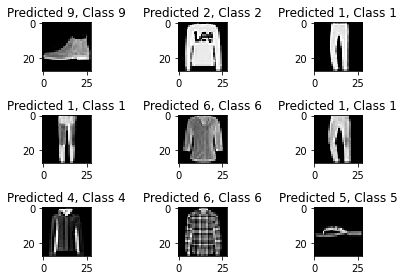

In [210]:
correct_index = np.where(class_predicted==test_labels)[0]
print ("Found %d correct labels" % len(correct_index))
for i, correct_index in enumerate(correct_index[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_images[correct_index].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(class_predicted[correct_index], test_labels[correct_index]))
    plt.tight_layout()

Found 1118 incorrect labels


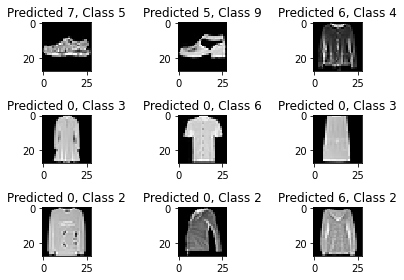

In [211]:
incorrect_index = np.where(class_predicted!=test_labels)[0]
print ("Found %d incorrect labels" % len(incorrect_index))
for i, incorrect_index in enumerate(incorrect_index[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_images[incorrect_index].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(class_predicted[incorrect_index], test_labels[incorrect_index]))
    plt.tight_layout()

For this part , I have taken reference from : [link](https://www.datacamp.com/community/tutorials/autoencoder-classifier-python)
